In [1]:
#The first part of this program is to predict the stock price 7 days after it's latest value
#The second part of this program is to make a list of the top 20(can be any number) stocks that show the most upward price estimate
#The final result should have the list of stock names and thier current and predicted price to make most profits.

In [ ]:
#The third part of this project is to test the model on the stock prices of a company for an entire year
#The idea is to find the ratio of P8/P1 for the entire year, that is 52 weeks and then take an average of all those values which
#..would give us an idea of the average loss or gain estimate for the entire year

In [1]:
import numpy as np    #numpy makes use of arrays in the program extremely efficient
import pandas as pd  #pandas is used for ML and Data analysis
import matplotlib.pyplot as plt  #used to plot graphs 
from collections import Counter #counter 
from collections import OrderedDict

from sklearn.preprocessing import MinMaxScaler #importing the MinMaxScaler to normalize the data and fit it in the range of 0 to 1

from keras.models import Sequential #importing keras libraries to build the model that predicts the price 
from keras.layers import LSTM    # Using the LSTM recurrent neural network to predict the value using adam optimizer and mean loss squared error approx
from keras.layers import Dropout  #dropout is used to ignore a certain percentage of values to avoid overfitting of data
from keras.layers import Dense 


             Date        Close    Symbol
75082  01-07-2002    -0.010462  ADANIENT
75083  02-07-2002    -0.010544  ADANIENT
75084  03-07-2002    -0.010544  ADANIENT
75085  04-07-2002    -0.010603  ADANIENT
75086  05-07-2002    -0.010580  ADANIENT
...           ...          ...       ...
80048  14-06-2022  2196.449951  ADANIENT
80049  15-06-2022  2184.600098  ADANIENT
80050  15-06-2022  2184.600098  ADANIENT
80051  16-06-2022  2083.000000  ADANIENT
80052  17-06-2022  2095.800049  ADANIENT

[4971 rows x 3 columns]
Epoch 1/25
154/154 [==============================] - 21s 91ms/step - loss: 0.0024
Epoch 2/25
154/154 [==============================] - 19s 125ms/step - loss: 9.2178e-04
Epoch 3/25
154/154 [==============================] - 20s 133ms/step - loss: 7.1464e-04
Epoch 4/25
154/154 [==============================] - 20s 129ms/step - loss: 6.8308e-04
Epoch 5/25
154/154 [==============================] - 19s 126ms/step - loss: 9.3342e-04
Epoch 6/25
154/154 [============================

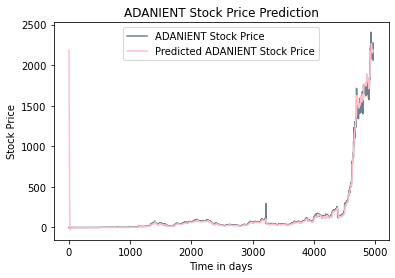

1/1 [==============================] - 3s 3s/step
             Date        Close      Symbol
80053  18-06-2018    31.500000  ADANIGREEN
80054  19-06-2018    32.599998  ADANIGREEN
80055  20-06-2018    31.000000  ADANIGREEN
80056  21-06-2018    29.650000  ADANIGREEN
80057  22-06-2018    29.450001  ADANIGREEN
...           ...          ...         ...
81050  14-06-2022  1788.750000  ADANIGREEN
81051  15-06-2022  1757.849976  ADANIGREEN
81052  15-06-2022  1757.849976  ADANIGREEN
81053  16-06-2022  1711.099976  ADANIGREEN
81054  17-06-2022  1711.250000  ADANIGREEN

[1002 rows x 3 columns]
Epoch 1/25
30/30 [==============================] - 11s 146ms/step - loss: 0.0227
Epoch 2/25
30/30 [==============================] - 4s 134ms/step - loss: 0.0056
Epoch 3/25
30/30 [==============================] - 4s 132ms/step - loss: 0.0038
Epoch 4/25
30/30 [==============================] - 4s 132ms/step - loss: 0.0037
Epoch 5/25
30/30 [==============================] - 5s 151ms/step - loss: 0.0042
Epo

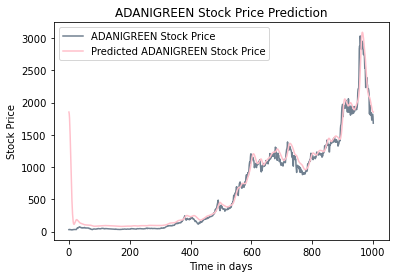

1/1 [==============================] - 2s 2s/step
             Date       Close      Symbol
81055  27-11-2007  177.675140  ADANIPORTS
81056  28-11-2007  163.965057  ADANIPORTS
81057  29-11-2007  164.335602  ADANIPORTS
81058  30-11-2007  172.117004  ADANIPORTS
81059  03-12-2007  181.565826  ADANIPORTS
...           ...         ...         ...
84646  14-06-2022  704.700012  ADANIPORTS
84647  15-06-2022  703.750000  ADANIPORTS
84648  15-06-2022  703.750000  ADANIPORTS
84649  16-06-2022  681.700012  ADANIPORTS
84650  17-06-2022  668.950012  ADANIPORTS

[3596 rows x 3 columns]
Epoch 1/25
111/111 [==============================] - 22s 147ms/step - loss: 0.0067
Epoch 2/25
111/111 [==============================] - 19s 171ms/step - loss: 0.0021
Epoch 3/25
111/111 [==============================] - 18s 158ms/step - loss: 0.0020
Epoch 4/25
111/111 [==============================] - 20s 176ms/step - loss: 0.0015
Epoch 5/25
111/111 [==============================] - 17s 156ms/step - loss: 0.0016
E

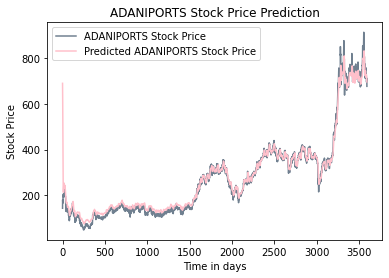

1/1 [==============================] - 1s 1s/step
             Date       Close      Symbol
84651  20-08-2009  100.099998  ADANIPOWER
84652  21-08-2009  103.150002  ADANIPOWER
84653  24-08-2009  103.099998  ADANIPOWER
84654  25-08-2009  102.750000  ADANIPOWER
84655  26-08-2009  105.099998  ADANIPOWER
...           ...         ...         ...
87819  14-06-2022  266.649994  ADANIPOWER
87820  15-06-2022  272.049988  ADANIPOWER
87821  15-06-2022  272.049988  ADANIPOWER
87822  16-06-2022  259.299988  ADANIPOWER
87823  17-06-2022  261.299988  ADANIPOWER

[3173 rows x 3 columns]
Epoch 1/25
98/98 [==============================] - 21s 144ms/step - loss: 0.0029
Epoch 2/25
98/98 [==============================] - 14s 147ms/step - loss: 0.0015
Epoch 3/25
98/98 [==============================] - 14s 139ms/step - loss: 0.0013
Epoch 4/25
98/98 [==============================] - 13s 128ms/step - loss: 0.0012
Epoch 5/25
98/98 [==============================] - 14s 139ms/step - loss: 9.7411e-04
Epoch 6

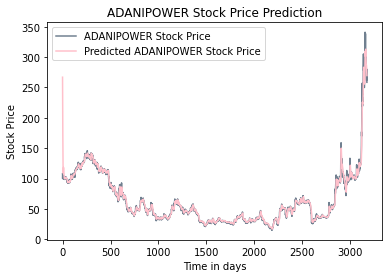

1/1 [==============================] - 2s 2s/step
             Date        Close      Symbol
87824  31-07-2015    27.600000  ADANITRANS
87825  03-08-2015    28.950001  ADANITRANS
87826  04-08-2015    30.350000  ADANITRANS
87827  05-08-2015    31.850000  ADANITRANS
87828  06-08-2015    33.400002  ADANITRANS
...           ...          ...         ...
89531  14-06-2022  2057.500000  ADANITRANS
89532  15-06-2022  2057.300049  ADANITRANS
89533  15-06-2022  2057.300049  ADANITRANS
89534  16-06-2022  2124.649902  ADANITRANS
89535  17-06-2022  2032.599976  ADANITRANS

[1712 rows x 3 columns]
Epoch 1/25
52/52 [==============================] - 14s 134ms/step - loss: 0.0088
Epoch 2/25
52/52 [==============================] - 8s 153ms/step - loss: 0.0027
Epoch 3/25
52/52 [==============================] - 8s 148ms/step - loss: 0.0025
Epoch 4/25
52/52 [==============================] - 8s 148ms/step - loss: 0.0023
Epoch 5/25
52/52 [==============================] - 8s 146ms/step - loss: 0.0024
Epo

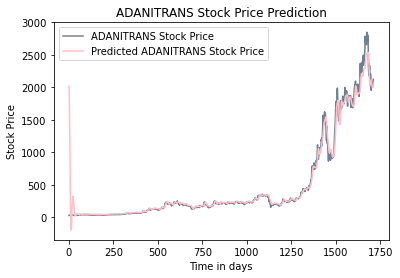

1/1 [==============================] - 2s 2s/step
             Date       Close    Symbol
89536  15-09-2010   68.019730  ADFFOODS
89537  16-09-2010   66.208176  ADFFOODS
89538  17-09-2010   66.553230  ADFFOODS
89539  20-09-2010   65.949371  ADFFOODS
89540  21-09-2010   63.318302  ADFFOODS
...           ...         ...       ...
92445  14-06-2022  717.549988  ADFFOODS
92446  15-06-2022  718.599976  ADFFOODS
92447  15-06-2022  718.599976  ADFFOODS
92448  16-06-2022  697.950012  ADFFOODS
92449  17-06-2022  686.250000  ADFFOODS

[2914 rows x 3 columns]
Epoch 1/25
90/90 [==============================] - 19s 131ms/step - loss: 0.0072
Epoch 2/25
90/90 [==============================] - 11s 121ms/step - loss: 0.0022
Epoch 3/25
90/90 [==============================] - 11s 125ms/step - loss: 0.0021
Epoch 4/25
90/90 [==============================] - 12s 130ms/step - loss: 0.0016
Epoch 5/25
90/90 [==============================] - 11s 122ms/step - loss: 0.0017
Epoch 6/25
90/90 [=================

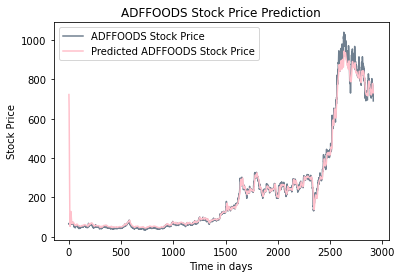

1/1 [==============================] - 2s 2s/step
             Date      Close Symbol
92450  01-10-2020  22.850000    ADL
92451  05-10-2020  22.400000    ADL
92452  06-10-2020  21.299999    ADL
92453  07-10-2020  21.750000    ADL
92454  08-10-2020  22.299999    ADL
...           ...        ...    ...
92885  14-06-2022  60.500000    ADL
92886  15-06-2022  61.049999    ADL
92887  15-06-2022  61.049999    ADL
92888  16-06-2022  61.450001    ADL
92889  17-06-2022  59.900002    ADL

[440 rows x 3 columns]
Epoch 1/25
12/12 [==============================] - 8s 112ms/step - loss: 0.1045
Epoch 2/25
12/12 [==============================] - 2s 147ms/step - loss: 0.0284
Epoch 3/25
12/12 [==============================] - 2s 140ms/step - loss: 0.0164
Epoch 4/25
12/12 [==============================] - 2s 150ms/step - loss: 0.0139
Epoch 5/25
12/12 [==============================] - 2s 157ms/step - loss: 0.0124
Epoch 6/25
12/12 [==============================] - 2s 143ms/step - loss: 0.0143
Epoch 7/

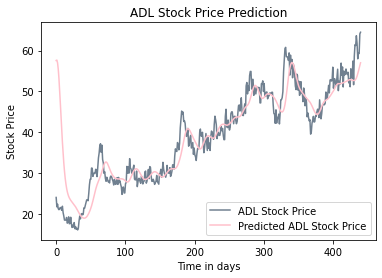

1/1 [==============================] - 2s 2s/step
             Date       Close    Symbol
92890  01-07-2002   13.477817  ADORWELD
92891  02-07-2002   14.318632  ADORWELD
92892  03-07-2002   16.247574  ADORWELD
92893  04-07-2002   15.505672  ADORWELD
92894  05-07-2002   17.780825  ADORWELD
...           ...         ...       ...
97855  14-06-2022  653.349976  ADORWELD
97856  15-06-2022  642.250000  ADORWELD
97857  15-06-2022  642.250000  ADORWELD
97858  16-06-2022  599.099976  ADORWELD
97859  17-06-2022  610.099976  ADORWELD

[4970 rows x 3 columns]
Epoch 1/25
154/154 [==============================] - 27s 131ms/step - loss: 0.0046
Epoch 2/25
154/154 [==============================] - 25s 164ms/step - loss: 0.0017
Epoch 3/25
154/154 [==============================] - 22s 146ms/step - loss: 0.0014
Epoch 4/25
154/154 [==============================] - 22s 145ms/step - loss: 0.0016
Epoch 5/25
154/154 [==============================] - 21s 134ms/step - loss: 0.0012
Epoch 6/25
154/154 [=====

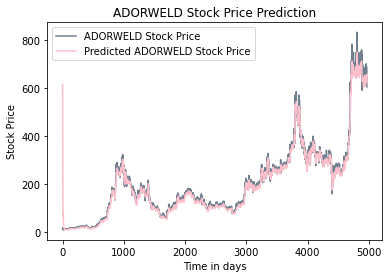

1/1 [==============================] - 2s 2s/step
             Date      Close      Symbol
97860  13-10-2015  51.950260  ADROITINFO
97861  14-10-2015  52.692406  ADROITINFO
97862  15-10-2015  53.385078  ADROITINFO
97863  16-10-2015  53.236649  ADROITINFO
97864  19-10-2015  50.960732  ADROITINFO
...           ...        ...         ...
99503  14-06-2022   8.800000  ADROITINFO
99504  15-06-2022   9.150000  ADROITINFO
99505  15-06-2022   9.150000  ADROITINFO
99506  16-06-2022   9.600000  ADROITINFO
99507  17-06-2022  10.050000  ADROITINFO

[1648 rows x 3 columns]
Epoch 1/25
50/50 [==============================] - 15s 178ms/step - loss: 0.0134
Epoch 2/25
50/50 [==============================] - 8s 168ms/step - loss: 0.0044
Epoch 3/25
50/50 [==============================] - 8s 165ms/step - loss: 0.0041
Epoch 4/25
50/50 [==============================] - 8s 162ms/step - loss: 0.0031
Epoch 5/25
50/50 [==============================] - 8s 163ms/step - loss: 0.0030
Epoch 6/25
50/50 [=========

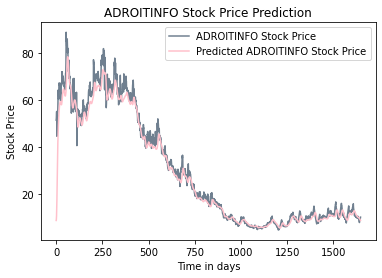

1/1 [==============================] - 1s 1s/step
              Date       Close Symbol
99508   25-07-2007  153.954926   ADSL
99509   26-07-2007  153.624054   ADSL
99510   27-07-2007  142.279495   ADSL
99511   30-07-2007  141.050507   ADSL
99512   31-07-2007  150.787903   ADSL
...            ...         ...    ...
103185  14-06-2022  116.650002   ADSL
103186  15-06-2022  131.050003   ADSL
103187  15-06-2022  131.050003   ADSL
103188  16-06-2022  120.699997   ADSL
103189  17-06-2022  119.750000   ADSL

[3682 rows x 3 columns]
Epoch 1/25
114/114 [==============================] - 23s 145ms/step - loss: 0.0041
Epoch 2/25
114/114 [==============================] - 15s 129ms/step - loss: 0.0021
Epoch 3/25
114/114 [==============================] - 15s 127ms/step - loss: 0.0017
Epoch 4/25
114/114 [==============================] - 18s 156ms/step - loss: 0.0016
Epoch 5/25
114/114 [==============================] - 20s 175ms/step - loss: 0.0016
Epoch 6/25
114/114 [=============================

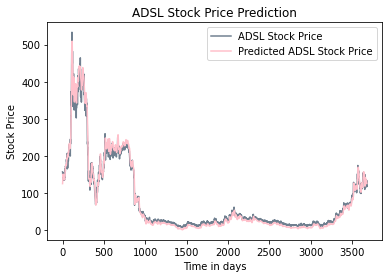

1/1 [==============================] - 2s 2s/step
              Date      Close      Symbol
103190  25-06-2007  42.480392  ADVANIHOTR
103191  26-06-2007  44.630421  ADVANIHOTR
103192  27-06-2007  46.867138  ADVANIHOTR
103193  28-06-2007  49.216576  ADVANIHOTR
103194  29-06-2007  51.678699  ADVANIHOTR
...            ...        ...         ...
106742  14-06-2022  67.599998  ADVANIHOTR
106743  15-06-2022  69.000000  ADVANIHOTR
106744  15-06-2022  69.000000  ADVANIHOTR
106745  16-06-2022  66.550003  ADVANIHOTR
106746  17-06-2022  67.349998  ADVANIHOTR

[3557 rows x 3 columns]
Epoch 1/25
110/110 [==============================] - 23s 148ms/step - loss: 0.0118
Epoch 2/25
110/110 [==============================] - 18s 159ms/step - loss: 0.0042
Epoch 3/25
110/110 [==============================] - 17s 154ms/step - loss: 0.0036
Epoch 4/25
110/110 [==============================] - 17s 155ms/step - loss: 0.0032
Epoch 5/25
110/110 [==============================] - 17s 157ms/step - loss: 0.0029
E

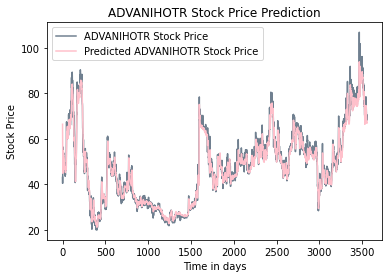

1/1 [==============================] - 2s 2s/step
              Date       Close      Symbol
106747  01-08-2016  233.014847  ADVENZYMES
106748  02-08-2016  271.989105  ADVENZYMES
106749  03-08-2016  270.930939  ADVENZYMES
106750  04-08-2016  270.268372  ADVENZYMES
106751  05-08-2016  281.641205  ADVENZYMES
...            ...         ...         ...
108209  14-06-2022  291.049988  ADVENZYMES
108210  15-06-2022  287.399994  ADVENZYMES
108211  15-06-2022  287.399994  ADVENZYMES
108212  16-06-2022  279.649994  ADVENZYMES
108213  17-06-2022  272.399994  ADVENZYMES

[1467 rows x 3 columns]
Epoch 1/25
44/44 [==============================] - 11s 111ms/step - loss: 0.0330
Epoch 2/25
44/44 [==============================] - 7s 151ms/step - loss: 0.0068
Epoch 3/25
44/44 [==============================] - 6s 144ms/step - loss: 0.0066
Epoch 4/25
44/44 [==============================] - 7s 149ms/step - loss: 0.0058
Epoch 5/25
44/44 [==============================] - 6s 145ms/step - loss: 0.0062
Epo

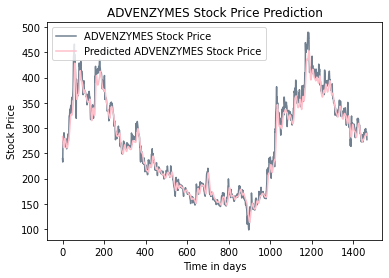

1/1 [==============================] - 2s 2s/step
              Date       Close     Symbol
108214  01-07-2002    0.620372  AEGISCHEM
108215  02-07-2002    0.608326  AEGISCHEM
108216  03-07-2002    0.604310  AEGISCHEM
108217  04-07-2002    0.590256  AEGISCHEM
108218  05-07-2002    0.574195  AEGISCHEM
...            ...         ...        ...
113156  14-06-2022  222.949997  AEGISCHEM
113157  15-06-2022  228.850006  AEGISCHEM
113158  15-06-2022  228.850006  AEGISCHEM
113159  16-06-2022  213.550003  AEGISCHEM
113160  17-06-2022  214.199997  AEGISCHEM

[4947 rows x 3 columns]
Epoch 1/25
153/153 [==============================] - 27s 134ms/step - loss: 0.0049
Epoch 2/25
153/153 [==============================] - 23s 153ms/step - loss: 0.0023
Epoch 3/25
153/153 [==============================] - 21s 140ms/step - loss: 0.0018
Epoch 4/25
153/153 [==============================] - 26s 171ms/step - loss: 0.0016
Epoch 5/25
153/153 [==============================] - 25s 161ms/step - loss: 0.0015
E

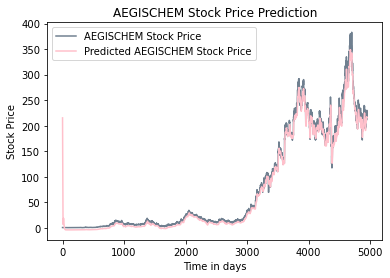

1/1 [==============================] - 2s 2s/step
              Date        Close Symbol
113161  08-08-2019   873.650024  AFFLE
113162  09-08-2019   843.049988  AFFLE
113163  13-08-2019   832.849976  AFFLE
113164  14-08-2019   835.150024  AFFLE
113165  16-08-2019   805.900024  AFFLE
...            ...          ...    ...
113878  14-06-2022   969.599976  AFFLE
113879  15-06-2022  1019.700012  AFFLE
113880  15-06-2022  1019.700012  AFFLE
113881  16-06-2022   991.650024  AFFLE
113882  17-06-2022   957.750000  AFFLE

[722 rows x 3 columns]
Epoch 1/25
21/21 [==============================] - 9s 116ms/step - loss: 0.0589
Epoch 2/25
21/21 [==============================] - 3s 128ms/step - loss: 0.0174
Epoch 3/25
21/21 [==============================] - 3s 136ms/step - loss: 0.0158
Epoch 4/25
21/21 [==============================] - 3s 160ms/step - loss: 0.0160
Epoch 5/25
21/21 [==============================] - 3s 167ms/step - loss: 0.0140
Epoch 6/25
21/21 [==============================] - 3

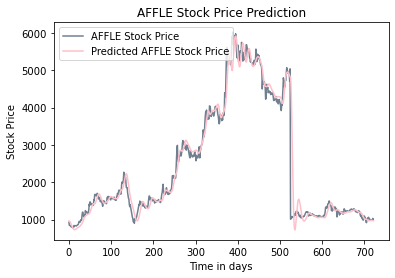

1/1 [==============================] - 1s 1s/step
              Date       Close   Symbol
113883  26-05-2014  159.492050  AGARIND
113884  27-05-2014  158.473816  AGARIND
113885  28-05-2014  158.751511  AGARIND
113886  29-05-2014  165.462601  AGARIND
113887  30-05-2014  154.539749  AGARIND
...            ...         ...      ...
115881  14-06-2022  474.549988  AGARIND
115882  15-06-2022  473.100006  AGARIND
115883  15-06-2022  473.100006  AGARIND
115884  16-06-2022  441.350006  AGARIND
115885  17-06-2022  448.100006  AGARIND

[2003 rows x 3 columns]
Epoch 1/25
61/61 [==============================] - 13s 116ms/step - loss: 0.0127
Epoch 2/25
61/61 [==============================] - 8s 133ms/step - loss: 0.0048
Epoch 3/25
61/61 [==============================] - 8s 137ms/step - loss: 0.0040
Epoch 4/25
61/61 [==============================] - 10s 158ms/step - loss: 0.0035
Epoch 5/25
61/61 [==============================] - 10s 164ms/step - loss: 0.0042
Epoch 6/25
61/61 [===================

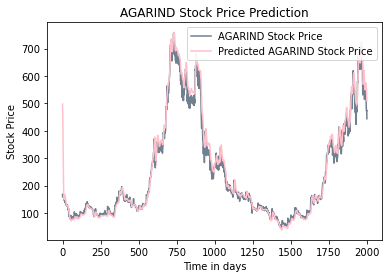

1/1 [==============================] - 1s 1s/step
              Date       Close  Symbol
115886  01-07-2002   67.851662  AGCNET
115887  02-07-2002   69.061043  AGCNET
115888  03-07-2002   69.018600  AGCNET
115889  04-07-2002   68.870102  AGCNET
115890  05-07-2002   71.352463  AGCNET
...            ...         ...     ...
120705  10-12-2021  888.599976  AGCNET
120706  13-12-2021  860.099976  AGCNET
120707  14-12-2021  874.849976  AGCNET
120708  14-12-2021  874.849976  AGCNET
120709  15-12-2021  855.049988  AGCNET

[4824 rows x 3 columns]
Epoch 1/25
149/149 [==============================] - 29s 153ms/step - loss: 0.0018
Epoch 2/25
149/149 [==============================] - 29s 193ms/step - loss: 0.0012
Epoch 3/25
149/149 [==============================] - 26s 174ms/step - loss: 9.9160e-04
Epoch 4/25
149/149 [==============================] - 27s 181ms/step - loss: 9.6474e-04
Epoch 5/25
149/149 [==============================] - 26s 171ms/step - loss: 7.5223e-04
Epoch 6/25
149/149 [=====

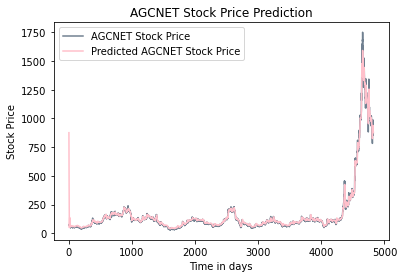

1/1 [==============================] - 1s 1s/step
              Date      Close    Symbol
120710  28-01-2014  35.150002  AGRITECH
120711  29-01-2014  33.400002  AGRITECH
120712  30-01-2014  33.400002  AGRITECH
120713  31-01-2014  31.750000  AGRITECH
120714  03-02-2014  30.200001  AGRITECH
...            ...        ...       ...
122711  14-06-2022  78.900002  AGRITECH
122712  15-06-2022  77.650002  AGRITECH
122713  15-06-2022  77.650002  AGRITECH
122714  16-06-2022  74.849998  AGRITECH
122715  17-06-2022  73.650002  AGRITECH

[2006 rows x 3 columns]
Epoch 1/25
61/61 [==============================] - 16s 161ms/step - loss: 0.0113
Epoch 2/25
61/61 [==============================] - 9s 154ms/step - loss: 0.0035
Epoch 3/25
61/61 [==============================] - 20s 336ms/step - loss: 0.0033
Epoch 4/25
61/61 [==============================] - 19s 304ms/step - loss: 0.0029
Epoch 5/25
61/61 [==============================] - 19s 309ms/step - loss: 0.0031
Epoch 6/25
61/61 [==================

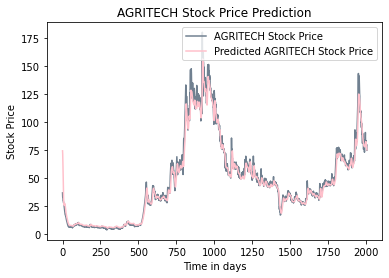

1/1 [==============================] - 4s 4s/step
              Date      Close    Symbol
122716  15-03-2017  20.715872  AGROPHOS
122717  16-03-2017  21.464638  AGROPHOS
122718  17-03-2017  21.264967  AGROPHOS
122719  20-03-2017  21.264967  AGROPHOS
122720  21-03-2017  20.965460  AGROPHOS
...            ...        ...       ...
123999  14-06-2022  30.100000  AGROPHOS
124000  15-06-2022  31.600000  AGROPHOS
124001  15-06-2022  31.600000  AGROPHOS
124002  16-06-2022  33.150002  AGROPHOS
124003  17-06-2022  34.799999  AGROPHOS

[1288 rows x 3 columns]
Epoch 1/25
39/39 [==============================] - 27s 280ms/step - loss: 0.0125
Epoch 2/25
39/39 [==============================] - 11s 279ms/step - loss: 0.0061
Epoch 3/25
39/39 [==============================] - 11s 276ms/step - loss: 0.0042
Epoch 4/25
39/39 [==============================] - 11s 279ms/step - loss: 0.0041
Epoch 5/25
39/39 [==============================] - 11s 270ms/step - loss: 0.0035
Epoch 6/25
39/39 [=================

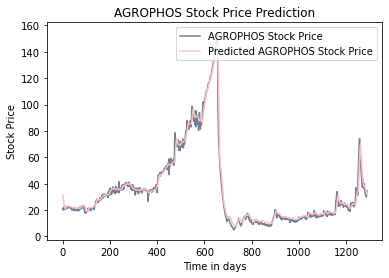

1/1 [==============================] - 4s 4s/step
              Date       Close  Symbol
124004  12-10-2018  133.804230  AHLADA
124005  15-10-2018  134.808121  AHLADA
124006  16-10-2018  133.469589  AHLADA
124007  17-10-2018  131.318405  AHLADA
124008  19-10-2018  130.696930  AHLADA
...            ...         ...     ...
124582  14-06-2022   89.599998  AHLADA
124583  15-06-2022   89.000000  AHLADA
124584  15-06-2022   89.000000  AHLADA
124585  16-06-2022   86.949997  AHLADA
124586  17-06-2022   83.400002  AHLADA

[583 rows x 3 columns]
Epoch 1/25
17/17 [==============================] - 20s 271ms/step - loss: 0.0537
Epoch 2/25
17/17 [==============================] - 5s 268ms/step - loss: 0.0225
Epoch 3/25
17/17 [==============================] - 5s 268ms/step - loss: 0.0185
Epoch 4/25
17/17 [==============================] - 5s 268ms/step - loss: 0.0163
Epoch 5/25
17/17 [==============================] - 5s 268ms/step - loss: 0.0140
Epoch 6/25
17/17 [==============================] - 

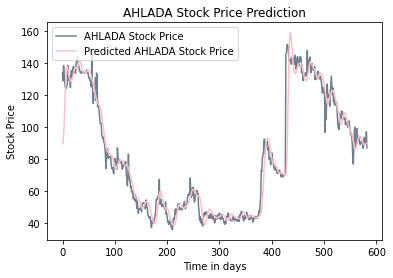

1/1 [==============================] - 3s 3s/step
              Date       Close   Symbol
124587  11-08-2010  346.590240  AHLEAST
124588  12-08-2010  334.548584  AHLEAST
124589  13-08-2010  335.901062  AHLEAST
124590  16-08-2010  327.524262  AHLEAST
124591  17-08-2010  296.852936  AHLEAST
...            ...         ...      ...
127492  14-06-2022  220.350006  AHLEAST
127493  15-06-2022  220.350006  AHLEAST
127494  15-06-2022  220.350006  AHLEAST
127495  16-06-2022  216.899994  AHLEAST
127496  17-06-2022  217.899994  AHLEAST

[2910 rows x 3 columns]
Epoch 1/25
90/90 [==============================] - 41s 279ms/step - loss: 0.0104
Epoch 2/25
90/90 [==============================] - 25s 279ms/step - loss: 0.0037
Epoch 3/25
90/90 [==============================] - 25s 276ms/step - loss: 0.0032
Epoch 4/25
90/90 [==============================] - 25s 280ms/step - loss: 0.0031
Epoch 5/25
90/90 [==============================] - 25s 279ms/step - loss: 0.0026
Epoch 6/25
90/90 [=================

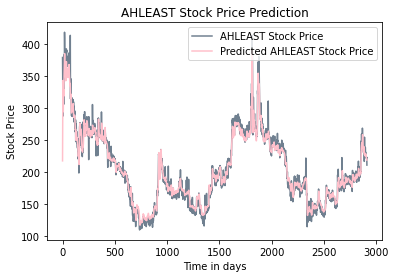

1/1 [==============================] - 4s 4s/step
              Date       Close    Symbol
127497  14-12-2009  176.506622  AHLUCONT
127498  15-12-2009  174.475540  AHLUCONT
127499  16-12-2009  175.416763  AHLUCONT
127500  17-12-2009  176.952469  AHLUCONT
127501  18-12-2009  175.813080  AHLUCONT
...            ...         ...       ...
130588  14-06-2022  422.000000  AHLUCONT
130589  15-06-2022  409.450012  AHLUCONT
130590  15-06-2022  409.450012  AHLUCONT
130591  16-06-2022  400.299988  AHLUCONT
130592  17-06-2022  392.000000  AHLUCONT

[3096 rows x 3 columns]
Epoch 1/25
95/95 [==============================] - 44s 292ms/step - loss: 0.0145
Epoch 2/25
95/95 [==============================] - 27s 288ms/step - loss: 0.0044
Epoch 3/25
95/95 [==============================] - 27s 289ms/step - loss: 0.0036
Epoch 4/25
95/95 [==============================] - 27s 287ms/step - loss: 0.0034
Epoch 5/25
95/95 [==============================] - 27s 287ms/step - loss: 0.0033
Epoch 6/25
95/95 [=====

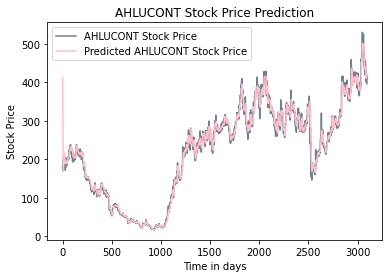

1/1 [==============================] - 3s 3s/step
              Date       Close   Symbol
130593  05-08-2010  369.985046  AHLWEST
130594  06-08-2010  357.947266  AHLWEST
130595  09-08-2010  341.395294  AHLWEST
130596  10-08-2010  328.428131  AHLWEST
130597  11-08-2010  323.648407  AHLWEST
...            ...         ...      ...
133510  14-06-2022  146.500000  AHLWEST
133511  15-06-2022  146.500000  AHLWEST
133512  15-06-2022  146.500000  AHLWEST
133513  16-06-2022  146.500000  AHLWEST
133514  17-06-2022  146.500000  AHLWEST

[2922 rows x 3 columns]
Epoch 1/25
90/90 [==============================] - 41s 283ms/step - loss: 0.0139
Epoch 2/25
90/90 [==============================] - 25s 278ms/step - loss: 0.0042
Epoch 3/25
90/90 [==============================] - 25s 279ms/step - loss: 0.0040
Epoch 4/25
90/90 [==============================] - 25s 278ms/step - loss: 0.0036
Epoch 5/25
90/90 [==============================] - 24s 269ms/step - loss: 0.0036
Epoch 6/25
90/90 [=================

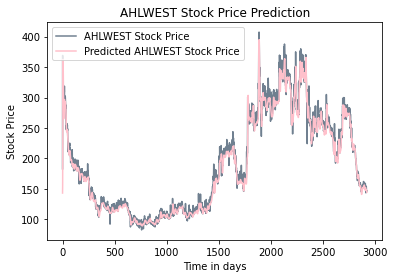

1/1 [==============================] - 1s 1s/step
              Date        Close  Symbol
133515  14-12-2005    87.613312  AIAENG
133516  15-12-2005    91.151711  AIAENG
133517  16-12-2005   101.356941  AIAENG
133518  19-12-2005    97.693756  AIAENG
133519  20-12-2005    92.444077  AIAENG
...            ...          ...     ...
137591  14-06-2022  2045.050049  AIAENG
137592  15-06-2022  2114.100098  AIAENG
137593  15-06-2022  2114.100098  AIAENG
137594  16-06-2022  2087.149902  AIAENG
137595  17-06-2022  2087.399902  AIAENG

[4081 rows x 3 columns]
Epoch 1/25
126/126 [==============================] - 19s 110ms/step - loss: 0.0130
Epoch 2/25
126/126 [==============================] - 13s 102ms/step - loss: 0.0031
Epoch 3/25
126/126 [==============================] - 13s 107ms/step - loss: 0.0027
Epoch 4/25
126/126 [==============================] - 17s 134ms/step - loss: 0.0027
Epoch 5/25
126/126 [==============================] - 14s 112ms/step - loss: 0.0022
Epoch 6/25
126/126 [=====

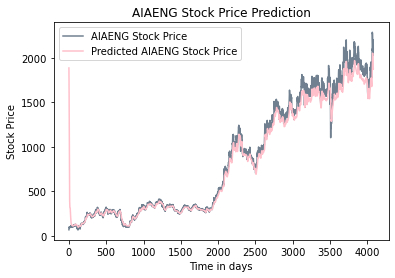

1/1 [==============================] - 1s 1s/step
              Date      Close Symbol
137596  25-07-2017  14.045000  AIRAN
137597  26-07-2017  14.690000  AIRAN
137598  27-07-2017  14.690000  AIRAN
137599  31-07-2017  14.575000  AIRAN
137600  01-08-2017  14.575000  AIRAN
...            ...        ...    ...
138773  14-06-2022  21.450001  AIRAN
138774  15-06-2022  21.700001  AIRAN
138775  15-06-2022  21.700001  AIRAN
138776  16-06-2022  20.850000  AIRAN
138777  17-06-2022  20.500000  AIRAN

[1182 rows x 3 columns]
Epoch 1/25
36/36 [==============================] - 11s 141ms/step - loss: 0.0323
Epoch 2/25
36/36 [==============================] - 5s 140ms/step - loss: 0.0075
Epoch 3/25
36/36 [==============================] - 5s 144ms/step - loss: 0.0073
Epoch 4/25
36/36 [==============================] - 5s 145ms/step - loss: 0.0067
Epoch 5/25
36/36 [==============================] - 5s 142ms/step - loss: 0.0062
Epoch 6/25
36/36 [==============================] - 5s 129ms/step - loss: 0

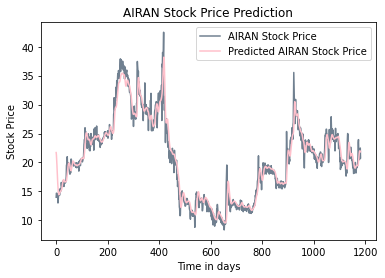

1/1 [==============================] - 2s 2s/step
              Date        Close      Symbol
138778  01-07-2002     5.226544  AJANTPHARM
138779  02-07-2002     5.205617  AJANTPHARM
138780  03-07-2002     5.200386  AJANTPHARM
138781  04-07-2002     5.226544  AJANTPHARM
138782  05-07-2002     5.216081  AJANTPHARM
...            ...          ...         ...
143743  14-06-2022  1785.199951  AJANTPHARM
143744  15-06-2022  1778.900024  AJANTPHARM
143745  15-06-2022  1778.900024  AJANTPHARM
143746  16-06-2022  1806.300049  AJANTPHARM
143747  17-06-2022  1804.750000  AJANTPHARM

[4970 rows x 3 columns]
Epoch 1/25
154/154 [==============================] - 27s 133ms/step - loss: 0.0083
Epoch 2/25
154/154 [==============================] - 20s 130ms/step - loss: 0.0023
Epoch 3/25
154/154 [==============================] - 21s 135ms/step - loss: 0.0022
Epoch 4/25
154/154 [==============================] - 21s 139ms/step - loss: 0.0018
Epoch 5/25
154/154 [==============================] - 20s 129

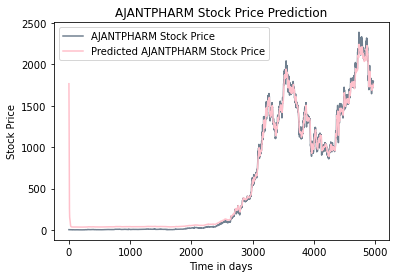

1/1 [==============================] - 1s 1s/step
              Date       Close  Symbol
143748  27-09-2006  132.076752  AJMERA
143749  28-09-2006  137.507767  AJMERA
143750  29-09-2006  143.450439  AJMERA
143751  03-10-2006  157.815155  AJMERA
143752  04-10-2006  165.725632  AJMERA
...            ...         ...     ...
147572  14-06-2022  249.250000  AJMERA
147573  15-06-2022  250.199997  AJMERA
147574  15-06-2022  250.199997  AJMERA
147575  16-06-2022  239.449997  AJMERA
147576  17-06-2022  229.149994  AJMERA

[3829 rows x 3 columns]
Epoch 1/25
118/118 [==============================] - 22s 147ms/step - loss: 0.0074
Epoch 2/25
118/118 [==============================] - 16s 136ms/step - loss: 0.0028
Epoch 3/25
118/118 [==============================] - 15s 125ms/step - loss: 0.0025
Epoch 4/25
118/118 [==============================] - 15s 125ms/step - loss: 0.0021
Epoch 5/25
118/118 [==============================] - 15s 128ms/step - loss: 0.0020
Epoch 6/25
118/118 [=================

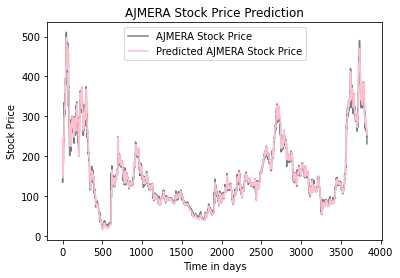

1/1 [==============================] - 1s 1s/step


In [4]:
df = pd.read_csv("C:\\Users\\Siddhant\\OneDrive\\Desktop\\Data\\All_Yahoo_Prices.csv") #importing our dataset
df = df[['Date','Close','Symbol']].copy() #modifying the dataset into the date, close and symbol columns only
 

Stocklist= list(OrderedDict.fromkeys(df['Symbol'])) #creating a list of all the stocks in the dataset
estimate_price=[]  #estimate price list that will store our predicted price data
latest_value=[]   #list to store the latest available value in the dataset
ratio=[]  # list to store the ratio of estimate_price and latest_value
stock_name=[] #list to store the stock names respective of the above data


#defing a function that returns the predicted price of each stock 

def estimate(S):
    
    df1=df.loc[df['Symbol']==S] #initializing our dataframe with the repsective stock name 
    print(df1)
    num= len(df1.axes[0]) #number of days of data available 
    
    training_set = df1.iloc[:, 1:2].values  #using the closing price values and initializing them to the training set
   
    sc = MinMaxScaler(feature_range=(0,1)) #fits the closing price values in the range of 0 to 1
    scaled_training_set = sc.fit_transform(training_set) #normalizing data using minmaxscaler
    
    X_train = [] 
    y_train =[]
    prediction_days=60 # number of days of data we will use to predict the value (can be changed )
    
    for i in range(prediction_days,num):
        X_train.append(scaled_training_set[i-60:i, 0])
        y_train.append(scaled_training_set[i, 0])
    
    X_train, y_train = np.array(X_train), np.array(y_train) 
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) #makig x and y trains and preparing them to fit the LSTM model
   
    #Building the model 
    model = Sequential ()
    
    model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    
    model.add(LSTM(units=50,return_sequences=True))
    model.add(Dropout(0.2))
    
    model.add(LSTM(units=50,return_sequences=True))
    model.add(Dropout(0.2))
    
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    
    model.add(Dense(units=1)) #prediction of the closing value
    
    model.compile(optimizer='adam',loss='mean_squared_error')
    model.fit(X_train,y_train,epochs=25,batch_size=32) #compiling the values and using the adam optimizer to optimize data
    
    #TESTING THE MODEL
    
    dataset_test = pd.read_csv("C:\\Users\\Siddhant\\OneDrive\\Desktop\\Data\\All_Yahoo_Prices.csv")
    dataset_test=dataset_test.loc[dataset_test['Symbol'] == S]
    real_stock_price = dataset_test.iloc[:, 1:2].values #taking the actual stock prices 
    dataset_total = pd.concat((df1['Close'], dataset_test['Close']), axis = 0) 
    
    inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values 
    inputs = inputs.reshape(-1,1)
    inputs = sc.transform(inputs)
    
    #Making predictions on test data
    X_test = []
    for i in range(prediction_days,len(inputs)):
        X_test.append(inputs[i-60:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
    predicted_stock_price = model.predict(X_test)  #predicting the stock price using test values to check for accuracy
    predicted_stock_price = sc.inverse_transform(predicted_stock_price) #inverse transforming our final value
    
    #plotting the test predictions; gives us an idea of how accurately we predited the past values 
    plt.plot(real_stock_price, color = 'slategrey', label = S + ' Stock Price')
    plt.plot(predicted_stock_price, color = 'pink', label = 'Predicted '+ S +' Stock Price')
    plt.title(S +' Stock Price Prediction')
    plt.xlabel('Time in days')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()
    
    #Predicting the value of the stock after 7 days
  
    real_data= [inputs[len(inputs)+7- prediction_days:len(inputs+7),0]]
    real_data= np.array(real_data)
    real_data= np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))
    predicted_value=model.predict(real_data)
    predicted_value= sc.inverse_transform(predicted_value)
    return predicted_value #returning final predicted stock price after day1+7 days 
 
    # Calling the estimate function and making lists of all the necessary data elements 
c=0
for i in range (30,): 

    df_new=df.loc[df['Symbol']==Stocklist[i]]
    x=estimate(Stocklist[i]) #calling the estimate function by sending the stock name as argument 
    estimate_price.append(x) #adding the estimated prices in a list 
    latest_value.append(df_new.Close.iat[-1]) #current value list 
    #calculating the ratio of P8/P1
    ratio.append(estimate_price[c] / latest_value[c]) #ratio list
    stock_name.append(Stocklist[i])
    c=c+1
    #print(df_new.Close.iat[-1])

#len(Stocklist)-1


    


    

In [5]:
result=list(zip(stock_name,estimate_price,latest_value,ratio)) #making a list with the stock name , predicted price , current price and their ratio

data=df = pd.DataFrame(result, columns=[' Stock Name ', 'Predited Price(t+7 days) ','Actual Price (t day) ','Ratio'])
final_data= data.sort_values(by = 'Ratio',ascending = False)
print (final_data)



    Stock Name  Predited Price(t+7 days)   Actual Price (t day)   \
14      AGARIND             [[497.10938]]             448.100006   
1    ADANIGREEN             [[1839.3557]]            1711.250000   
18       AHLADA              [[89.57453]]              83.400002   
25       AJMERA             [[245.87842]]             229.149994   
23        AIRAN             [[21.714558]]              20.500000   
5      ADFFOODS              [[722.8525]]             686.250000   
20     AHLUCONT             [[411.90576]]             392.000000   
9          ADSL              [[125.5511]]             119.750000   
11   ADVENZYMES             [[282.98776]]             272.399994   
0      ADANIENT             [[2177.0613]]            2095.800049   
2    ADANIPORTS              [[690.1868]]             668.950012   
15       AGCNET              [[875.5431]]             855.049988   
3    ADANIPOWER              [[266.9134]]             261.299988   
16     AGRITECH              [[74.40725]]       

In [ ]:
#TESTING THE MODEL ON THE DATA FOR AN ENTIRE YEAR 
